In [26]:
library(tidyverse)
library(ggnewscale)
library(viridis)

Loading required package: viridisLite



In [2]:
path <- "/home/brett/work/OrthogonalTrainValSplits/K562_orthoSplit/analysis/cross_fold_max_sw_analysis/aggregated.split.cross_fold_analysis.csv.gz"
df <- read.csv(path)
head(df)
dim(df)

,fold_i,fold_j,max_sw_score,condition
,<int>,<int>,<dbl>,<chr>
1,0,0,200,hashFrag folds
2,0,1,186,Chromosomal folds
3,0,2,190,Chromosomal folds
4,0,3,184,Chromosomal folds
5,0,4,189,Chromosomal folds
6,0,5,181,Chromosomal folds


[1] 100   4

In [20]:
install.packages("ggpattern")

also installing the dependency ‘gridpattern’




In [21]:
library(ggpattern)

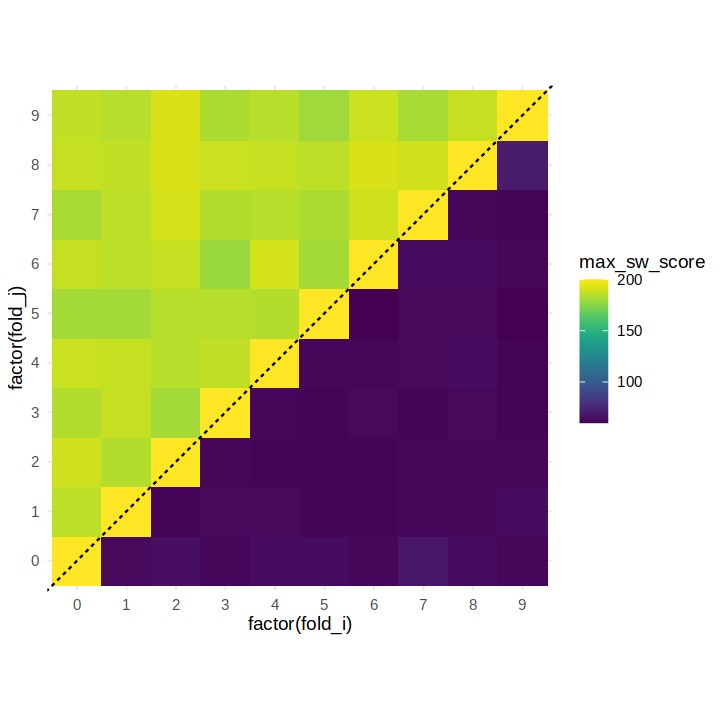

In [33]:
options(repr.plot.width=6,repr.plot.height=6)
ggplot(df,aes(x=factor(fold_i),y=factor(fold_j),fill=max_sw_score)) +
    geom_tile() +
    geom_abline(intercept=0, slope=1, color="black", linetype="dashed") +
    scale_fill_viridis(option="viridis") +
    theme_minimal() + theme(
        aspect.ratio=1
    )

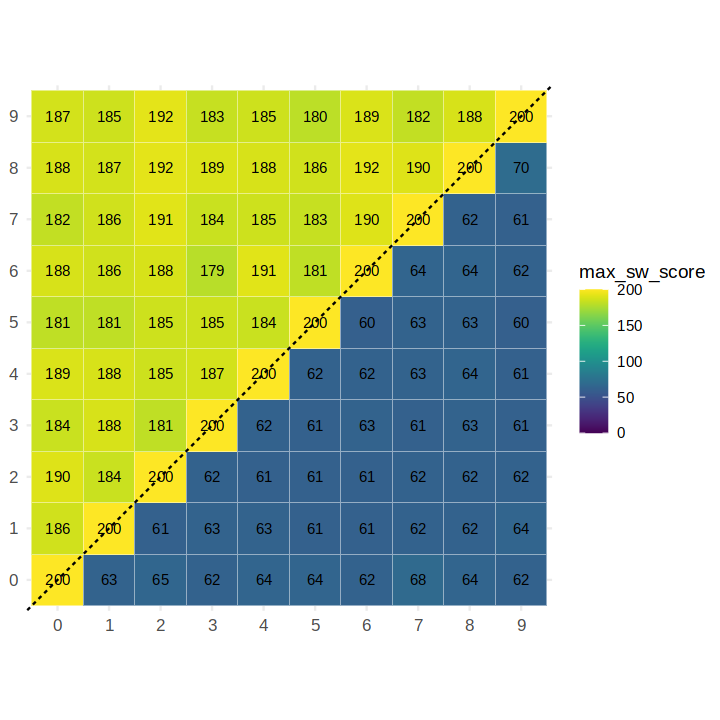

In [34]:
ggplot(df, aes(x=factor(fold_i), y=factor(fold_j), fill=max_sw_score)) +
  geom_tile(color = "white") +  # optional: tile borders
  geom_abline(intercept=0, slope=1, color="black", linetype="dashed") +
  geom_text(aes(label=round(max_sw_score)), color="black", size=3) +  # overlay values
  scale_fill_viridis(option="viridis", limits=c(0, 200)) +
  theme_minimal() +
  theme(
    aspect.ratio = 1,
    axis.title = element_blank(),
    axis.text = element_text(size=10)
  )

In [44]:
min(df$max_sw_score)

[1] 60

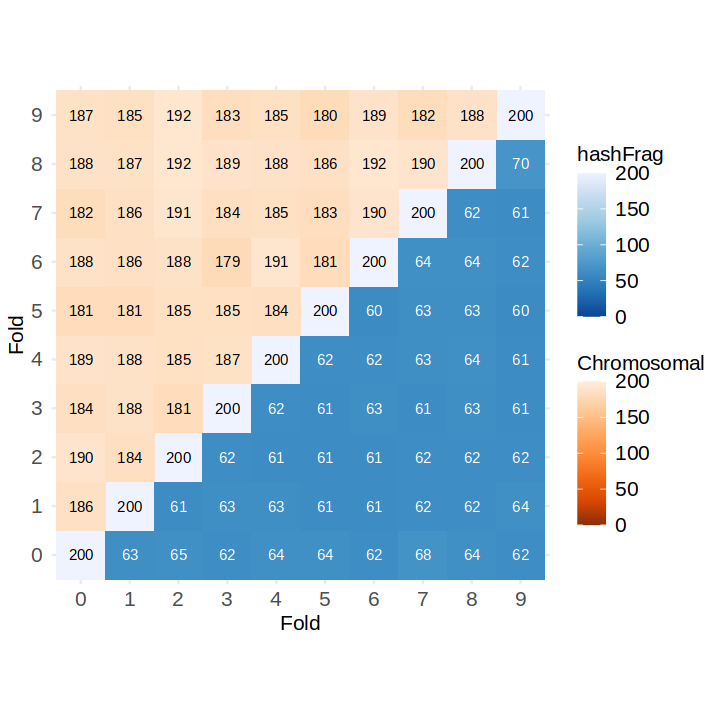

In [53]:
options(repr.plot.width=6,repr.plot.height=6)
ggplot(df,aes(x=factor(fold_i),y=factor(fold_j))) +
    geom_tile(
        data = . %>% filter(condition=="hashFrag folds"),
        mapping = aes(fill=max_sw_score)
    ) +
    scale_fill_distiller(palette="Blues",limits=c(0,200),name="hashFrag") +
    new_scale_fill() +
    geom_tile(
        data = . %>% filter(condition == "Chromosomal folds"),
        mapping = aes(fill=max_sw_score)
    ) +
    scale_fill_distiller(palette="Oranges",limits=c(0,200),name="Chromosomal") +
    # geom_text(aes(label=round(max_sw_score)), color="black", size=3) +  # overlay values
    geom_text(aes(
      label = round(max_sw_score),
      color = max_sw_score <= 150  # logical, TRUE = one color, FALSE = another
    ),
    size = 3
    ) +
    labs(
        x = "Fold",
        y = "Fold"
    ) +
    scale_color_manual(values=c("black","white"), guide="none") + 
    theme_minimal() +
    theme(
        aspect.ratio = 1,
        axis.title = element_text(size=12),
        axis.text = element_text(size=12),
        legend.text = element_text(size=12),
        legend.title =element_text(size=12)
    )

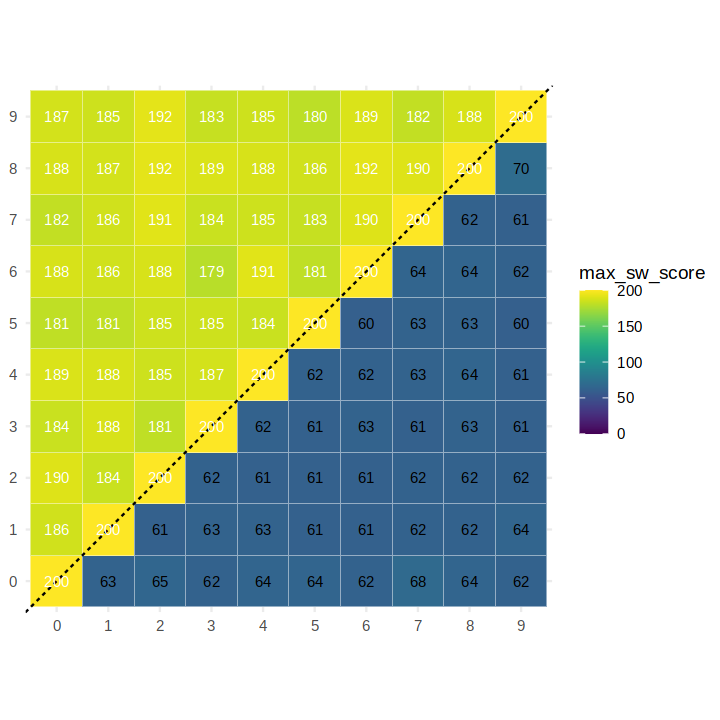

In [49]:
ggplot(df, aes(x=factor(fold_i), y=factor(fold_j), fill=max_sw_score)) +
  geom_tile(color = "white") +
  geom_abline(intercept=0, slope=1, color="black", linetype="dashed") +
  geom_text(aes(
      label = round(max_sw_score),
      color = max_sw_score > 100  # logical, TRUE = one color, FALSE = another
    ),
    size = 3
  ) +
  scale_fill_viridis(option="viridis", limits=c(0,200)) +
  scale_color_manual(values=c("black","white"), guide="none") +  # black for FALSE, white for TRUE
  theme_minimal() +
  theme(aspect.ratio = 1, axis.title = element_blank())